# Problem Statement
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by 
"National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us 
to perform this prediction.

Constraints on data collection
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage

### Import Libraries and load dataset

In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [453]:
df = pd.read_csv('pima-indians-diabetes.csv')
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [454]:
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

Observation :
    
Our dataset contains int and float values 

In [455]:
df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values? Plasma, BP, skin thickness etc. these values 
cannot be 0. look at column by column logically to understand this.

In [456]:
df.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [457]:
df.head(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Observation :

In pres column some values are founded as 0 which can not be true beacause A normal blood pressure level is less than 120/80 mmHg nut never 0 mmHg.

In skin column some values are founded as 0 which can not be true beacause which is 23 but never 0.

In test column some values are founded as 0 which can not be true beacause A normal measurement of free insulin is less than 17 mcU/mL but never 0 mcU/mL.

In mass column some values are founded as 0 which can not be true beacause A normal measurement of mass can be 
18.5 - 25 kg/m2 but never 0 kg/m2.

In age column some values are founded as 0 which can not be true beacause we can not count age as 0.


In [458]:
df[['Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']]==0

,Plas,Pres,skin,test,mass,pedi,age
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False
764,False,False,False,True,False,False,False
765,False,False,False,False,False,False,False
766,False,False,True,True,False,False,False


Observation :

The "True" values in this table shows that, at that particular number "0" value is founded.

In [459]:
df[['Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']].median()

Plas    117.0000
Pres     72.0000
skin     23.0000
test     30.5000
mass     32.0000
pedi      0.3725
age      29.0000
dtype: float64

Median = [(n/2)th term + {(n/2)+1}th term]/2

With the help of median values of given columns we will replace "0" values with their Corresponding column.

In [460]:
df['Plas'] = df['Plas'].replace(0,117)

Observation :
    
Replace Plas's 0 values with 117.

In [461]:
df['Pres'] = df['Pres'].replace(0,72)

Observation :
    
Replace Pres's 0 values with 72.

In [462]:
df['skin'] = df['skin'].replace(0,23)

Observation :
    
Replace skin's 0 values with 23.

In [463]:
df['test'] = df['test'].replace(0,30.5000)

Observation :
    
Replace test's 0 values with 30.5000.

In [464]:
df['mass'] = df['Plas'].replace(0,32.0000)

Observation :
    
Replace mass's 0 values with 32.0000.

In [465]:
df['pedi'] = df['pedi'].replace(0,0.3725)

Observation :
    
Replace pedi's 0 values with 0.3725.

In [466]:
df['age'] = df['age'].replace(0,29)

Observation :
    
Replace age's 0 values with 29.

In [467]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,121.656250,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,30.438286,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,44.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,99.750000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,117.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,140.250000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,199.000000,2.420000,81.000000,1.000000


Minimum and Maximum values of 'Preg' is respectively 0,17 and mean is 3.845052

Minimum and Maximum values of 'Plas' is respectively 44,199 and mean is 121.656250

Minimum and Maximum values of 'Pres' is respectively 24,122 and mean is 72.386719

Minimum and Maximum values of 'skin' is respectively 7,99 and mean is 27.334635

Minimum and Maximum values of 'test' is respectively 14,846 and mean is 94.652344

Minimum and Maximum values of 'mass' is respectively 44,199 and mean is 121.656250

Minimum and Maximum values of 'mass' is respectively 0.078,2.42 and mean is 0.471876

Minimum and Maximum values of 'age' is respectively  21,81 and mean is 33.240885

Minimum and Maximum values of 'class' is respectively 0,1 and mean is 0.348958

Note : The mean is the sum of all values divided by the total number of values

<Axes: >

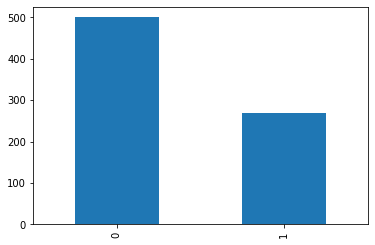

In [468]:
df['class'].value_counts().plot.bar()

Observation :
    
This bar chart describes that more than 450 patients tested negative for diabities and hardly 300 patients tested positive for diabities.

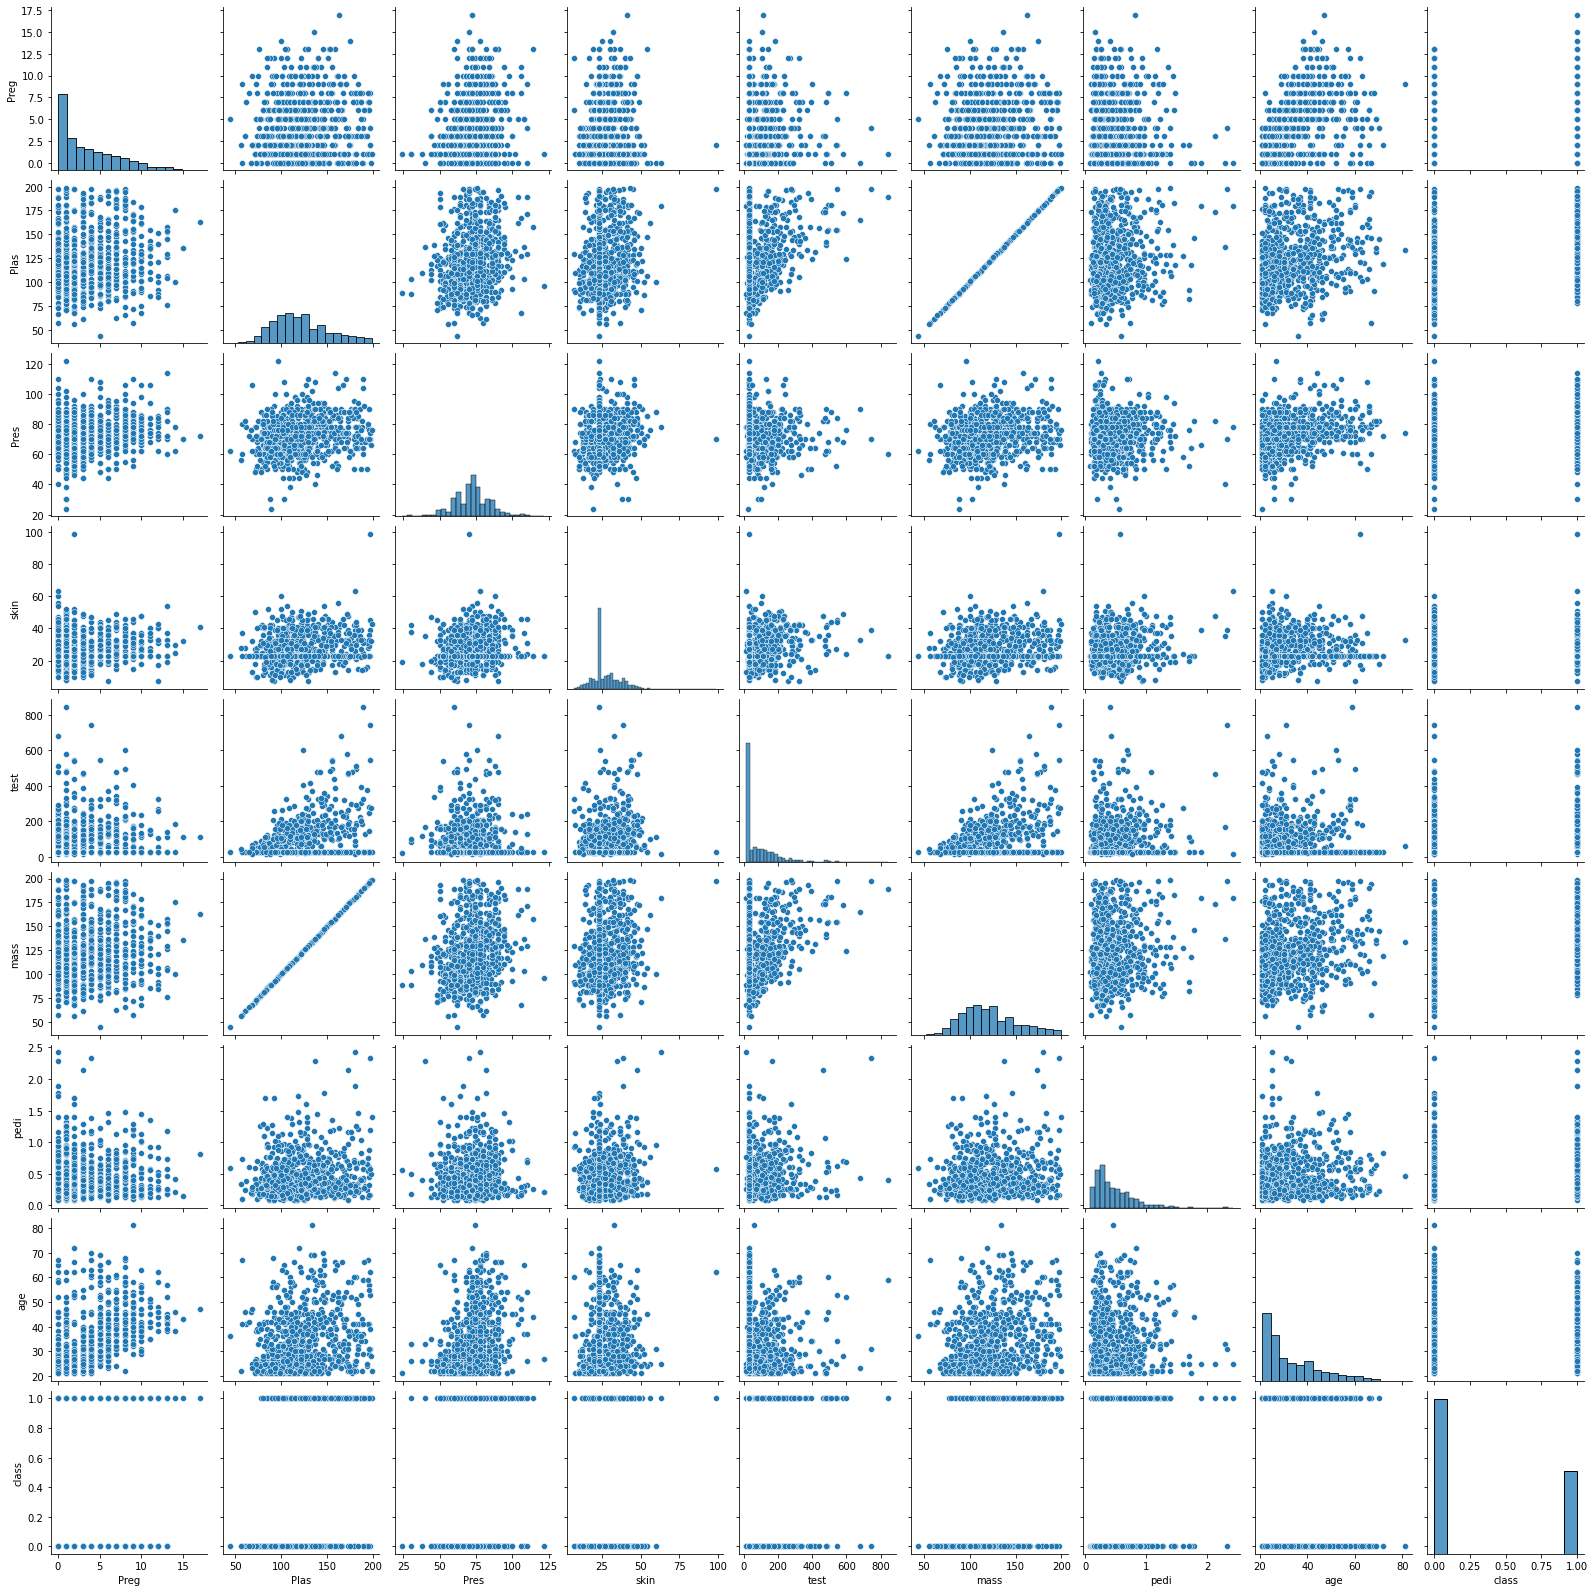

In [469]:
sns.pairplot(df)

This pairplot shows that perfect correlation is founded between mass an Plas column.

Check for correlation between variables whose values are >0.8

<Axes: >

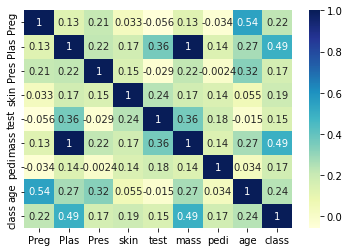

In [470]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Observation :
    
Only one correlation between Plas and mass is founded more than 0.8

Second highest correlation founded between Preg and age which is 0.54

Lowest correlation founded between Pedi and Pres which is -0.0024

In [471]:
#Apply train_test_split on dataframe and take 70% data as a input and 30% data as a output 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state=10)

Divide the whole data in 70:30 ratio for trainig and testing data.

set random state = 10

In [472]:
#Top 5 values of X_train dataset
X_train.head()

,Preg,Plas,test,mass,pedi,age
491,2,89,3,33.5,0.292,42
69,4,146,100,28.9,0.189,27
667,10,111,3,27.5,0.141,40
566,1,99,18,38.6,0.412,21
97,1,71,76,20.4,0.323,22


Import MinMaxScaler

In [478]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler is use to Transform features by scaling each feature to a given range

In [479]:
scaler = MinMaxScaler()

Store MinMaxScaler in scaler 

In [480]:
X_train = scaler.fit_transform(X_train)

Perform fit and transform operation on X_train data.

In [481]:
#Print X_train
X_train

array([[0.11764706, 0.43877551, 0.        , 0.47581903, 0.09137489,
        0.35      ],
       [0.23529412, 0.72959184, 0.11506524, 0.40405616, 0.04739539,
        0.1       ],
       [0.58823529, 0.55102041, 0.        , 0.38221529, 0.02690009,
        0.31666667],
       ...,
       [0.17647059, 0.57653061, 0.12099644, 0.36349454, 0.01238258,
        0.05      ],
       [0.05882353, 0.43367347, 0.113879  , 0.81123245, 0.17847993,
        0.08333333],
       [0.29411765, 0.4744898 , 0.07591934, 0.4773791 , 0.39239966,
        0.36666667]])

In [483]:
X_test = scaler.transform(X_test)

Perform transform operation on X_test

In [484]:
X_test

array([[  4.   , 154.   , 126.   ,  31.3  ,   0.338,  37.   ],
       [  2.   , 112.   , 160.   ,  38.4  ,   0.246,  28.   ],
       [  1.   , 135.   ,   3.   ,  26.7  ,   0.687,  62.   ],
       ...,
       [  3.   , 150.   ,   3.   ,  21.   ,   0.207,  37.   ],
       [  3.   , 130.   ,   3.   ,  23.1  ,   0.314,  22.   ],
       [  0.   , 108.   ,   3.   ,  27.3  ,   0.787,  32.   ]])

Perform transform on X_test

In [440]:
#Print X_test 
X_test

array([[0.23529412, 0.77040816, 0.14590747, 0.44149766, 0.11101623,
        0.26666667],
       [0.11764706, 0.55612245, 0.18623962, 0.55226209, 0.07173356,
        0.11666667],
       [0.05882353, 0.67346939, 0.        , 0.36973479, 0.26003416,
        0.68333333],
       ...,
       [0.17647059, 0.75      , 0.        , 0.28081123, 0.05508113,
        0.26666667],
       [0.17647059, 0.64795918, 0.        , 0.31357254, 0.10076857,
        0.01666667],
       [0.        , 0.53571429, 0.        , 0.37909516, 0.30273271,
        0.18333333]])

In [420]:
y_train

491    0
69     0
667    1
566    0
97     0
      ..
369    1
320    0
527    0
125    1
265    0
Name: class, Length: 537, dtype: int64

In [427]:
y_test

568    0
620    0
456    0
197    1
714    0
      ..
345    0
408    1
304    0
686    0
202    0
Name: class, Length: 231, dtype: int64

Import DecisionTreeClassifier 

In [401]:
from sklearn.tree import DecisionTreeClassifier

Create a entropy with the help of criterion='entropy'on our datset.
and fit it on X_train,y_train 

In [402]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In the context of Decision Trees, entropy is a measure of disorder or impurity in a node

In [421]:
#Find accuracy on X_test,y_test 
accuracy = clf.score(X_test,y_test)

In [422]:
print('Accuracy',accuracy)

Accuracy 0.7186147186147186


### Observation :

#### Accuracy = 71%

Model tunned the accuracy around 71%.

### Model Validation

In [448]:
y_pred = clf.predict([[1,85,30.5000,26.6,0.351,31]])

Given values are predicted value of 'Preg',Plas','test','mass','pedi','age' columns respectively.

In [450]:
y_pred

array([1])

According to given data our model predict that patient is tested negative in diabities.